# Meet Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="datasets/ignaz_semmelweis_1860.jpeg">
-->

This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about childbed fever: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and wash their hands!



In this notebook, i going to reanalyze the data that made Semmelweis discover the importance of handwashing. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.

Let's begin exploring how Dr. Semmelweis came to his conclusions!

In [1]:
# importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
clinic_data =  pd.read_csv('yearly.csv')

# show clinic_data
clinic_data

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


# Dr. Semmelweis dataset
The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an alarming number of women died as the result of childbirth, most of them from childbed fever.

## Explore the data
How many variables does it have?         

How many numerical variables and how many categorical variables does it have?

In [2]:
clinic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [3]:
clinic_data.describe()

,year,births,deaths
count,12.000000,12.000000,12.000000
mean,1843.500000,3152.750000,223.333333
std,1.783765,449.078476,145.383089
min,1841.000000,2442.000000,66.000000
25%,1842.000000,2901.750000,100.250000
50%,1843.500000,3108.500000,219.500000
75%,1845.000000,3338.250000,263.500000
max,1846.000000,4010.000000,518.000000


In [4]:
clinic_data.size

48

In [5]:
clinic_data.shape

(12, 4)

In [6]:
clinic_data.columns

Index(['year', 'births', 'deaths', 'clinic'], dtype='object')

In [7]:
clinic_data.dtypes

year       int64
births     int64
deaths     int64
clinic    object
dtype: object

In [8]:
# numerical cols
['births', 'deaths'] # continuous

# categorical cols
['year', 'clinic'] # (ordinal, nominal)

['year', 'clinic']

we have two clinics. We can group the data by the clinic and calculate.

In [9]:
clinic_data.groupby("clinic").count()
# here we group by clinic and count the amount of entries per variable for each clinic

,year,births,deaths
clinic,,,
clinic 1,6,6,6
clinic 2,6,6,6


In [10]:
clinic_data.groupby("clinic").mean()
# here we group by clinic and calculate the mean per variable for each clinic

,year,births,deaths
clinic,,,
clinic 1,1843.5,3340.333333,331.500000
clinic 2,1843.5,2965.166667,115.166667


In [11]:
# median for all variables by clinic
clinic_data.groupby('clinic').median()

,year,births,deaths
clinic,,,
clinic 1,1843.5,3222.0,267.0
clinic 2,1843.5,2847.5,95.5


Which clinic has more births in total?

In [12]:
clinic_data.groupby('clinic').sum().births.idxmax()

'clinic 1'

Which clinich has more deaths in total?

In [13]:
clinic_data.groupby('clinic').sum().deaths.idxmax()

'clinic 1'

How many mean births are there per year?

How many mean deaths there per year?

In [14]:
clinic_data.groupby('year').mean()

,births,deaths
year,,
1841,2739.0,161.5
1842,2973.0,360.0
1843,2899.5,219.0
1844,3056.5,164.0
1845,3366.5,153.5
1846,3882.0,282.0


## Findings

So we have some basic understanding of the dataset and the background. DEATH RATE WAS TOO HIGH. 2 clinics were identified(clinic 1 and clinic 2)
lets have a look at the proportion of deaths out of the number of women giving birth per clinic . 

### create new col called proportion_deaths

In [15]:
clinic_data['proportion_deaths'] = clinic_data.deaths / clinic_data.births
clinic_data.head(3)

,year,births,deaths,clinic,proportion_deaths
0,1841,3036,237,clinic 1,0.078063
1,1842,3287,518,clinic 1,0.157591
2,1843,3060,274,clinic 1,0.089542


### create new dataframes for each clinic

In [16]:
clinic1_data = clinic_data[clinic_data.clinic == 'clinic 1']
clinic2_data = clinic_data[clinic_data.clinic == 'clinic 2']

### compare proportion of deaths in clinic 1 vs 2

In [17]:
print('=== Mean ===')
print(clinic_data.groupby('clinic').mean().proportion_deaths)

print('\n=== Median ===')
print(clinic_data.groupby('clinic').median().proportion_deaths)

print('\n=== Standard Deviation ===')
print(clinic_data.groupby('clinic').std().proportion_deaths)

=== Mean ===
clinic
clinic 1    0.098505
clinic 2    0.040400
Name: proportion_deaths, dtype: float64

=== Median ===
clinic
clinic 1    0.085950
clinic 2    0.031594
Name: proportion_deaths, dtype: float64

=== Standard Deviation ===
clinic
clinic 1    0.032785
clinic 2    0.022494
Name: proportion_deaths, dtype: float64


### Plot the proportion of deaths at both clinic 1 and clinic 2

In [18]:
ax = clinic1_data.plot(y="proportion_deaths", x="year",
              label="clinic1")
clinic2_data.plot(y="proportion_deaths", x="year",
         label="clinic2", ax=ax);

Death rate in clinic 1 is more

# Effect of The handwashing

<p>Why is the proportion of deaths constantly so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. </p>
<p>Semmelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: <em>Wash your hands!</em> This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time. </p>
<p>Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.</p>

In [19]:
clinic_monthly = pd.read_csv('monthly.csv', parse_dates = ['date'])
clinic_monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


## Explore the dataset

### Calculate and creat proportion of deaths per no. births

In [20]:
clinic_monthly['proportion_deaths'] = clinic_monthly['deaths'] / clinic_monthly['births']

### get the maximum, minimum, mean, median, and standard deviation of the death rate (proportion_deaths)

In [21]:
print('Max:', clinic_monthly.proportion_deaths.max())
print('Min:', clinic_monthly.proportion_deaths.min())
print('Mean:', clinic_monthly.proportion_deaths.mean())
print('Median:', clinic_monthly.proportion_deaths.median())
print('Standard Deviation:', clinic_monthly.proportion_deaths.std())

Max: 0.3138075313807531
Min: 0.0
Mean: 0.086202580922758
Median: 0.0622107579091116
Standard Deviation: 0.07181766368471133


### Create a new column called month

create function for use and  apply

In [22]:
def get_month(date):
  return date.month_name()

# use apply to add new column
clinic_monthly['month'] = clinic_monthly.date.apply(get_month)

In [23]:
# current data type of monthly
clinic_monthly.month.dtype

dtype('O')

In [24]:
# convert type to "category"
clinic_monthly['month'] = clinic_monthly.month.astype('category')

In [25]:
# new data type of monthly
clinic_monthly.month.dtype

CategoricalDtype(categories=['April', 'August', 'December', 'February', 'January', 'July',
                  'June', 'March', 'May', 'November', 'October', 'September'],
                 ordered=False)

### create a new categorical column for the proportion_deaths titled prop_deaths_category

I use the following logic to creat this column:

expected: Within one standard deviation from the mean

moderate: Within 1-2 standard deviations from the mean

high: More than two standard deviations from the mean

>>> First we creat the standard deviation columns

In [26]:
clinic_monthly['stan_devs'] = (clinic_monthly.proportion_deaths - clinic_monthly.proportion_deaths.mean())/clinic_monthly.proportion_deaths.std()

In [27]:
clinic_monthly.head()
#we have a manipulated table now

,date,births,deaths,proportion_deaths,month,stan_devs
0,1841-01-01,254,37,0.145669,January,0.828023
1,1841-02-01,239,18,0.075314,February,-0.151617
2,1841-03-01,277,12,0.043321,March,-0.597085
3,1841-04-01,255,4,0.015686,April,-0.981880
4,1841-05-01,255,2,0.007843,May,-1.091089


create function according to the logic

In [28]:
def get_prop_deaths_category(stan_devs):
  
  # get absolute value of standard deviation
  abs_std = abs(stan_devs)

  # return respective category
  if   abs_std <= 1: return 'expected'
  elif abs_std <= 2: return 'moderate'
  else:              return 'high'


clinic_monthly['prop_deaths_category'] = clinic_monthly.stan_devs.apply(get_prop_deaths_category)
clinic_monthly.head(3)

,date,births,deaths,proportion_deaths,month,stan_devs,prop_deaths_category
0,1841-01-01,254,37,0.145669,January,0.828023,expected
1,1841-02-01,239,18,0.075314,February,-0.151617,expected
2,1841-03-01,277,12,0.043321,March,-0.597085,expected


Get the frequency of each proportion of deaths category (i.e. how many months are labeled expected, moderate, high?)


In [29]:
clinic_monthly.prop_deaths_category.value_counts()

expected    67
moderate    28
high         3
Name: prop_deaths_category, dtype: int64

### create a dictionary mapping the full month name to its three letter abbreviation

In [30]:
month_map = {month: month[:3] for month in clinic_monthly.month.unique()}
month_map

{'January': 'Jan',
 'February': 'Feb',
 'March': 'Mar',
 'April': 'Apr',
 'May': 'May',
 'June': 'Jun',
 'July': 'Jul',
 'August': 'Aug',
 'September': 'Sep',
 'October': 'Oct',
 'November': 'Nov',
 'December': 'Dec'}

new column using the month_map dictionary

In [31]:
clinic_monthly['month_abreviation'] = clinic_monthly.month.map(month_map)

In [32]:
clinic_monthly.head(3)

,date,births,deaths,proportion_deaths,month,stan_devs,prop_deaths_category,month_abreviation
0,1841-01-01,254,37,0.145669,January,0.828023,expected,Jan
1,1841-02-01,239,18,0.075314,February,-0.151617,expected,Feb
2,1841-03-01,277,12,0.043321,March,-0.597085,expected,Mar


new column called year

In [33]:
clinic_monthly['year'] = clinic_monthly.date.apply(lambda date: date.year)

In [34]:
clinic_monthly.head(3)

,date,births,deaths,proportion_deaths,month,stan_devs,prop_deaths_category,month_abreviation,year
0,1841-01-01,254,37,0.145669,January,0.828023,expected,Jan,1841
1,1841-02-01,239,18,0.075314,February,-0.151617,expected,Feb,1841
2,1841-03-01,277,12,0.043321,March,-0.597085,expected,Mar,1841


## The effect of handwashing
With the data loaded i can now look at the proportion of deaths over time. In the plot below i haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!

Plot monthly proportion of deaths

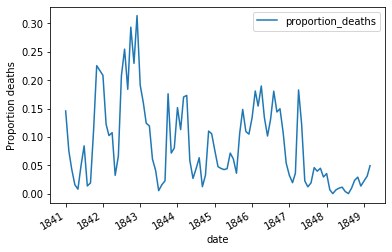

In [35]:
ax = clinic_monthly.plot(x = 'date', y = 'proportion_deaths')
ax.set_ylabel('Proportion deaths');

## The effect of handwashing highlighted
Starting from  1847 the proportion of deaths is drastically reduced and this was when Semmelweis made handwashing obligatory.

The effect of handwashing is made even more clear if we highlight this in the graph.

Create two new DataFrames called before_washing & after_washing that splits the data from when handwashing begins (1847-06-01)

In [36]:
begin_handwashing_date = pd.datetime(1847, 6, 1)

# filter each df accordingly and create new dfs
before_washing = clinic_monthly[clinic_monthly.date < begin_handwashing_date]
after_washing = clinic_monthly[clinic_monthly.date >= begin_handwashing_date]

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


Plot monthly proportion of deaths before and after handwashing

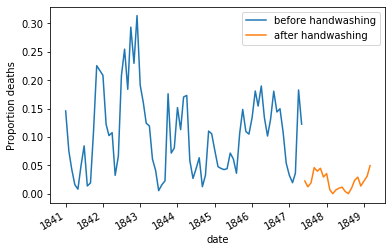

In [37]:
ax = before_washing.plot(x = 'date', y = 'proportion_deaths', label = "before handwashing")
after_washing.plot(y="proportion_deaths", x="date",
         label="after handwashing", ax=ax)
ax.set_ylabel('Proportion deaths');

## More handwashing, fewer deaths?

Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?

mean porportion deaths before handwashing and after.

In [38]:
before_mean = before_washing.proportion_deaths.mean()
after_mean = after_washing.proportion_deaths.mean()

print('Before:', before_mean)
print('After:', after_mean)

Before: 0.10504998260908793
After: 0.021093375097254535


Calculating the difference in mean monthly proportion of deaths due to handwashing

In [39]:
absolute_change = after_mean - before_mean
relative_change = (after_mean - before_mean) / before_mean

print(f'Absolute: {absolute_change * 100:.2f}%')
print(f'Relative: {relative_change * 100:.2f}%')

Absolute: -8.40%
Relative: -79.92%


# Conclusion

So handwashing reduced the proportion of deaths. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.

The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as bacteria) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.

One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis i have just put together he might have been more successful in getting the Viennese doctors to wash their hands.